In [202]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/josuhinrichs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [203]:
dataset = pd.read_csv('./data.csv')
dataset.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


### a) Análise Exploratória

#### Análise inicial dos dados

In [204]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [205]:
# Verificar o número de valores faltantes para cada coluna
valores_faltantes = dataset.isnull().sum()
print(valores_faltantes)

Sentence     0
Sentiment    0
dtype: int64


Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

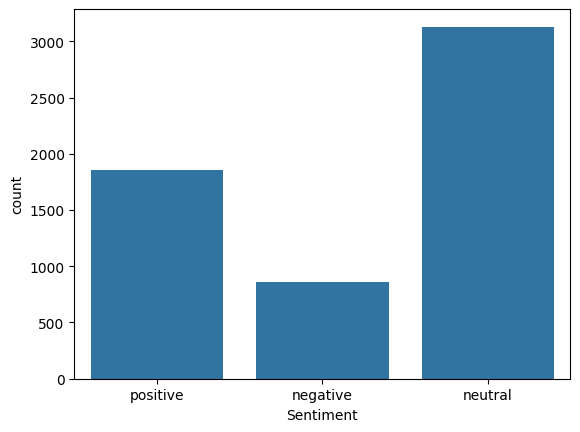

In [206]:
sns.countplot(x='Sentiment', data=dataset)
dataset['Sentiment'].value_counts()

In [207]:
#dataset['novacolumna']=[1,2,3]
#dataset
#tambem pode adicionar uma nova columna assim:
#dataset.insert(2,'nome',[1,2,3],True)

#### Explorando o comprimento dos textos (string)

In [208]:
dataset['length_text'] = dataset['Sentence'].apply(len)
dataset['length_text'].describe()

count    5842.000000
mean      117.020712
std        56.417790
min         9.000000
25%        72.000000
50%       107.000000
75%       150.000000
max       315.000000
Name: length_text, dtype: float64

##### Histograma

<Axes: xlabel='length_text', ylabel='Count'>

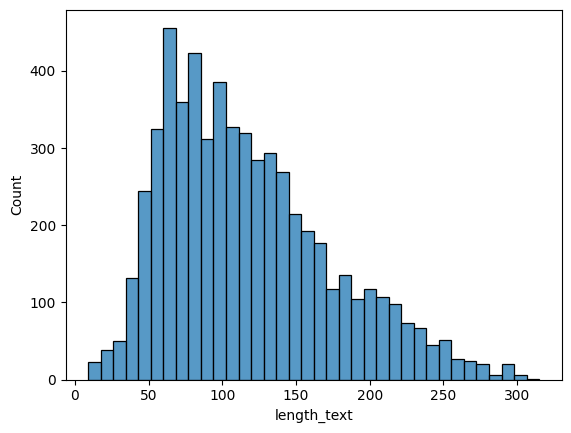

In [209]:
sns.histplot(dataset['length_text'])

##### Boxplot

<Axes: ylabel='length_text'>

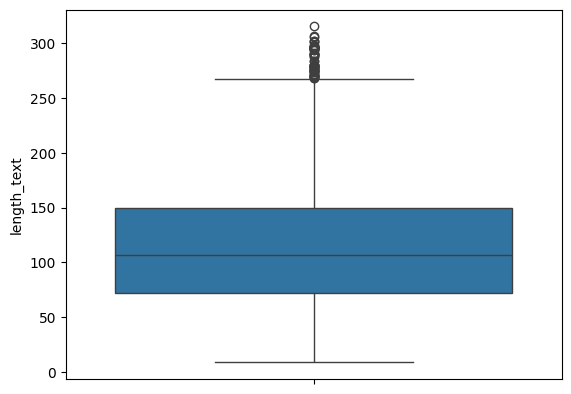

In [210]:
sns.boxplot(dataset['length_text'])

In [211]:
#corr_matrix = dataset['length_text'].corr(dataset['Sentiment'], method='pearson')


# Criando o heatmap
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.title('Heatmap de Correlação')
#plt.show()

In [212]:
dataset_tokens = []
stopwords = nltk.corpus.stopwords.words('english')

for entry in dataset['Sentence']:
    tokens = nltk.tokenize.word_tokenize(entry)
    dataset_tokens.append( [word for word in tokens if word not in stopwords and word.isalpha()] ) 

dataset_tokens[1]

['ESI', 'lows', 'BK', 'real', 'possibility']

In [213]:
# Quantos adjetivos tem  cada linha
nltk.download('averaged_perceptron_tagger')
new_col=[]
for linha in dataset_tokens:
    norm_words=[word.lower() for word in linha if word.isalpha()]
    ps_tagger=nltk.pos_tag(norm_words)
    #print(ps_tagger)
    #for i in ps_tagger:
    #    print(i[1])
    n_adj=len([i for i in ps_tagger if i[1]=='JJ'])
    print(n_adj)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/josuhinrichs/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


6
2
2
1
3
1
0
2
3
3
0
2
1
0
2
1
1
2
1
1
3
1
3
3
1
1
1
1
5
1
4
5
1
0
1
1
3
1
1
4
3
6
2
3
2
0
1
1
3
0
3
2
0
0
1
0
3
0
2
2
3
0
1
1
2
2
3
0
1
3
1
0
3
4
0
0
0
3
0
3
0
1
6
3
3
3
1
1
1
2
1
1
1
3
2
0
3
5
0
0
2
1
4
0
2
2
1
3
2
7
2
4
2
0
1
1
2
1
1
1
3
1
2
3
2
1
2
2
3
1
4
2
3
2
3
5
4
6
3
2
3
1
1
0
1
3
2
0
2
2
1
2
0
1
1
2
0
0
2
1
0
5
2
2
0
1
0
1
1
2
1
1
3
4
3
0
1
3
2
2
3
2
2
2
1
5
0
4
4
2
2
3
4
0
1
1
2
3
3
2
1
5
1
8
0
1
1
2
4
1
2
3
0
1
2
0
2
0
4
1
3
1
0
1
3
2
1
1
4
4
2
0
0
7
1
2
2
0
6
0
0
1
0
2
0
3
2
0
2
2
3
1
0
4
7
0
3
0
0
3
2
0
1
4
2
0
3
5
1
0
2
1
3
2
1
3
1
1
3
1
2
3
2
2
0
1
2
6
3
3
3
1
3
3
1
2
4
0
0
4
2
1
1
0
0
3
2
2
1
2
3
1
1
2
2
2
5
1
0
5
2
1
2
4
6
0
0
2
1
2
3
0
5
1
1
2
1
0
0
1
2
1
0
2
1
3
0
0
0
1
1
2
4
7
3
4
1
3
1
4
0
1
1
3
1
0
7
0
3
3
0
5
0
2
1
2
0
0
0
1
5
2
1
2
0
1
2
2
3
1
1
2
0
1
1
2
5
1
2
3
1
2
2
4
1
5
2
2
0
3
2
1
2
3
4
2
2
1
0
1
2
1
2
4
2
2
3
6
4
2
5
2
3
0
3
3
4
1
1
0
2
1
0
3
3
1
1
1
4
3
0
2
3
0
0
1
0
1
0
0
3
2
0
1
4
1
1
0
3
2
1
3
4
5
1
1
0
2
1
1
2
1
0
2
1
0
2
3
1
0
2
4
1
0
4
7
5
0
3
1


## b) Tratamento do dados

## c)

### Naive Bayes

In [217]:
texts = dataset['Sentence']
labels = dataset['Sentiment']

# Função para normalizar os textos
def normalize(text):
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text.lower())

    # Filtrar palavras
    filtered_words = [word for word in tokens if word not in stopwords and word.isalpha()]

    # Lematização
    lemma = nltk.WordNetLemmatizer()
    lemmatized = [lemma.lemmatize(word) for word in filtered_words]
    return lemmatized

In [218]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score

# Aplicar o TFID
vectorizer = CountVectorizer(
    tokenizer=normalize)

X = vectorizer.fit_transform(texts)

# Já que temos 3 classes é necessário usar um encoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(labels)

# Dividir em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


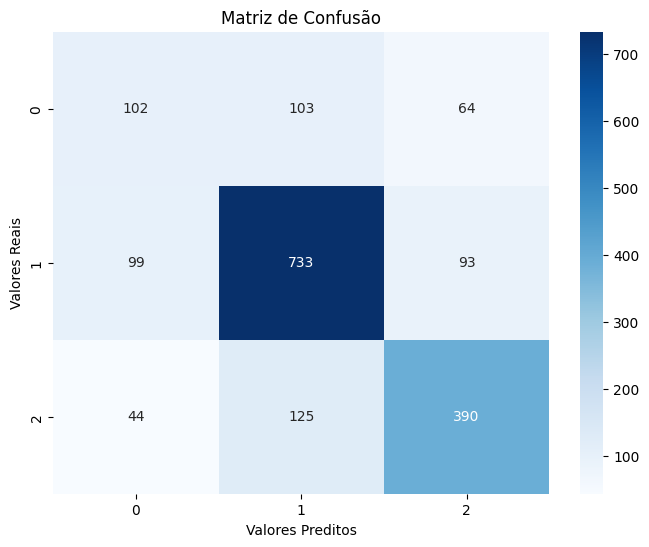

Scores de Validação Cruzada: [0.66809239 0.68092387 0.67808219 0.69520548 0.67465753]
Média dos Scores de Validação Cruzada: 0.6793922917374643
              precision    recall  f1-score   support

    negative       0.42      0.38      0.40       269
     neutral       0.76      0.79      0.78       925
    positive       0.71      0.70      0.71       559

    accuracy                           0.70      1753
   macro avg       0.63      0.62      0.63      1753
weighted avg       0.69      0.70      0.70      1753



In [220]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

# Treinar o modelo Naive Bayes Multinomial
model = MultinomialNB()
model.fit(X_train, y_train)

# Aplicar o modelo para predição
y_pred = model.predict(X_test)

# Plot da matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

# Validação Cruzada
cv_scores = cross_val_score(model, X, Y, cv=5)
print("Scores de Validação Cruzada:", cv_scores)
print("Média dos Scores de Validação Cruzada:", np.mean(cv_scores))

# Resultados gerais
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))